In [36]:
import pandas as pd
import seaborn as sns
from sklearn import tree
import matplotlib.pyplot as plt
import graphviz
from IPython.display import Image  
from sklearn.externals.six import StringIO  
import pydotplus

%matplotlib inline

In [37]:
df = pd.read_csv('titanic.csv')

print(df.shape)
print(df.dropna().shape) # what the shape would be after dropping na

(1309, 15)
(239, 15)


In [38]:
df.head()

,passengerid,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,destination
0,100,1,1,"Duff Gordon, Lady. (Lucille Christiana Sutherl...",female,48.0,1,0,11755,39.6000,A16,C,1,0,London / Paris
1,101,1,1,"Duff Gordon, Sir. Cosmo Edmund (""Mr Morgan"")",male,49.0,1,0,PC 17485,56.9292,A20,C,1,0,London / Paris
2,118,1,1,"Francatelli, Miss. Laura Mabel",female,30.0,0,0,PC 17485,56.9292,E36,C,1,0,NaN
3,257,1,1,"Salomon, Mr. Abraham L",male,NaN,0,0,111163,26.0000,NaN,S,1,0,"New York, NY"
4,281,1,1,"Stengel, Mr. Charles Emil Henry",male,54.0,1,0,11778,55.4417,C116,C,1,0,"Newark, NJ"


In [39]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
passengerid,1309.0,655.000000,378.020061,1.0000,328.0000,655.0000,982.000,1309.0000
pclass,1309.0,2.294882,0.837836,1.0000,2.0000,3.0000,3.000,3.0000
survived,1309.0,0.381971,0.486055,0.0000,0.0000,0.0000,1.000,1.0000
age,1046.0,29.881135,14.413500,0.1667,21.0000,28.0000,39.000,80.0000
sibsp,1309.0,0.498854,1.041658,0.0000,0.0000,0.0000,1.000,8.0000
parch,1309.0,0.385027,0.865560,0.0000,0.0000,0.0000,0.000,9.0000
fare,1308.0,33.295479,51.758668,0.0000,7.8958,14.4542,31.275,512.3292
body,1309.0,14.864782,55.197471,0.0000,0.0000,0.0000,0.000,328.0000


In [40]:
df.isna().sum()

passengerid       0
pclass            0
survived          0
name              0
sex               0
age             263
sibsp             0
parch             0
ticket            0
fare              1
cabin          1014
embarked          2
boat              0
body              0
destination     564
dtype: int64

In [41]:
# Create a subsetted dateframe 
df3 = df[['passengerid','pclass','survived','name','sex','parch','boat','body']]

# Drop the missing values
df3.dropna()

# check how much data was dropped
df3.shape

(1309, 8)

### <center> Figure No.1 </center>

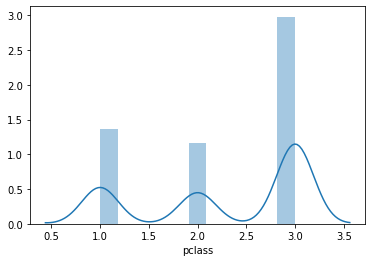

In [42]:
sns.distplot(df3.pclass)

### <center> Figure No.2 </center>

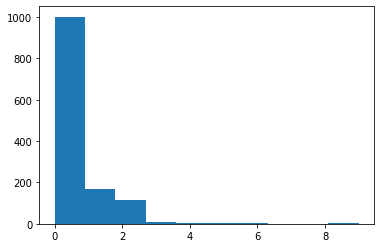

In [43]:
plt.hist(df3.parch)
plt.show()

### <center> Figure No.3 </center>

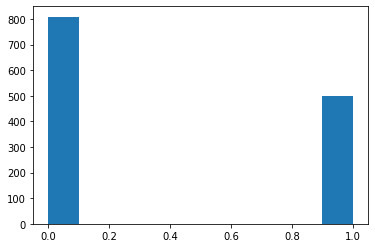

In [44]:
plt.hist(df3.survived)
plt.show()

### <center> Figure No.4 </center>

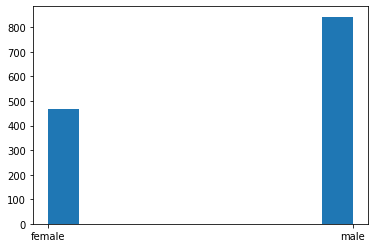

In [45]:
plt.hist(df3.sex)
plt.show()

In [46]:
pd.crosstab(df3.survived, df3.sex)

sex,female,male
survived,,
0,127,682
1,339,161


This crosstab counts the number of females vs. men who survived (1) and died (0). This shows 339 out of 466, 73% of women survived the titanic accident but only 161 out of 843, 20% of men survived. 

## Create Binaries

In [47]:
# Create dataset with features of interest
df2 = df[['pclass', 'survived', 'sex', 'age', 'sibsp', \
       'parch', 'ticket', 'fare', 'cabin']].copy()

In [48]:
# temp contains only the generated binary columns
temp = pd.get_dummies(df.sex, drop_first = True)
temp.head()

# the new male column is 1 for men and 0 for women

,male
0,0
1,1
2,0
3,1
4,1


In [49]:
df2 = pd.concat([df2, temp], axis=1)
df2.head()

,pclass,survived,sex,age,sibsp,parch,ticket,fare,cabin,male
0,1,1,female,48.0,1,0,11755,39.6000,A16,0
1,1,1,male,49.0,1,0,PC 17485,56.9292,A20,1
2,1,1,female,30.0,0,0,PC 17485,56.9292,E36,0
3,1,1,male,NaN,0,0,111163,26.0000,NaN,1
4,1,1,male,54.0,1,0,11778,55.4417,C116,1


## Model No. 1

In [50]:
df3.groupby('sex').describe().transpose()

sex                     female         male
passengerid count   466.000000   843.000000
            mean    591.673820   690.005931
            std     378.901560   373.167664
            min       1.000000     2.000000
            25%     256.500000   376.500000
            50%     568.000000   714.000000
            75%     934.500000  1008.000000
            max    1306.000000  1309.000000
pclass      count   466.000000   843.000000
            mean      2.154506     2.372479
            std       0.866181     0.811908
            min       1.000000     1.000000
            25%       1.000000     2.000000
            50%       2.000000     3.000000
            75%       3.000000     3.000000
            max       3.000000     3.000000
survived    count   466.000000   843.000000
            mean      0.727468     0.190985
            std       0.445741     0.393310
            min       0.000000     0.000000
            25%       0.000000     0.000000
            50%       1.000000     0.000000
            75%       1.000000     0.000000
            max       1.000000     1.000000
parch       count   466.000000   843.000000
            mean      0.633047     0.247924
            std       1.049579     0.708938
            min       0.000000     0.000000
            25%       0.000000     0.000000
            50%       0.000000     0.000000
            75%       1.000000     0.000000
            max       9.000000     9.000000
body        count   466.000000   843.000000
            mean      2.860515    21.500593
            std      27.506399    64.740215
            min       0.000000     0.000000
            25%       0.000000     0.000000
            50%       0.000000     0.000000
            75%       0.000000     0.000000
            max     328.000000   322.000000

In [147]:
# set up dependent variable (y)
y = df3.survived.copy()

# create a binary variable for sex 
# gender = 0 if they are a women
# gender = 1 if they are a man 
df3['gender'] = 0 # sets all to 0
df3.loc[df3['sex'] == 'male', 'gender'] = 1 # overwrite if sex is male

x = df3[['passengerid','pclass','survived','name','parch','gender']]

df3.head()

C:\Users\fraze\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,passengerid,pclass,survived,name,sex,parch,boat,body,gender
0,100,1,1,"Duff Gordon, Lady. (Lucille Christiana Sutherl...",female,0,1,0,0
1,101,1,1,"Duff Gordon, Sir. Cosmo Edmund (""Mr Morgan"")",male,0,1,0,1
2,118,1,1,"Francatelli, Miss. Laura Mabel",female,0,1,0,0
3,257,1,1,"Salomon, Mr. Abraham L",male,0,1,0,1
4,281,1,1,"Stengel, Mr. Charles Emil Henry",male,0,1,0,1


In [52]:
x['gender'].value_counts()

1    843
0    466
Name: gender, dtype: int64

In [53]:
x = x[['survived','gender']]

In [54]:
y.value_counts()

0    809
1    500
Name: survived, dtype: int64

### <center> Figure No.5 </center>

In [55]:
db_tree = tree.DecisionTreeClassifier(max_depth = 3, random_state = 0)
dp_tree = db_tree.fit(x,y)

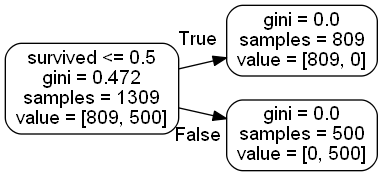

In [56]:
dot_data = StringIO()  
tree.export_graphviz(db_tree, out_file=dot_data,  
        feature_names=x.columns, rounded=True, rotate=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png()) 

#### Predictions using above decision tree

In [57]:
print(db_tree.predict([[0, 0]])) 

[0]


In [58]:
print(db_tree.predict([[0, 1]])) 

[0]


In [59]:
print(db_tree.predict([[1, 0]])) 

[1]


In [60]:
accuracy = db_tree.score(x,y) 
print("Your decision tree is {:.2f}% accurate.".format(accuracy*100))

Your decision tree is 100.00% accurate.


## Model No.2

In [62]:
y = df3['survived']
x = df3[['pclass', 'gender']]

In [63]:
db_tree = tree.DecisionTreeClassifier(max_depth = 2, random_state = 0)
dp_tree = db_tree.fit(x,y)

### <center> Figure No.6 </center>

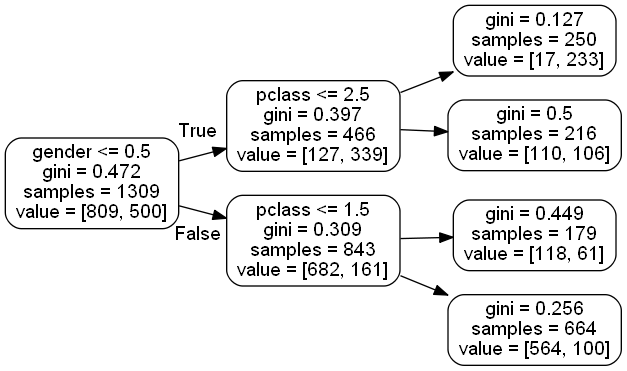

In [64]:
dot_data = StringIO()  
tree.export_graphviz(db_tree, out_file=dot_data,  
        feature_names=x.columns, rounded=True, rotate=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png()) 

#### Predictions using above decision tree

In [66]:
print(db_tree.predict([[0, 3]])) 

[0]


In [67]:
print(db_tree.predict([[2, 0]])) 

[1]


In [68]:
accuracy = db_tree.score(x,y) 
print("Your decision tree is {:.2f}% accurate.".format(accuracy*100))

Your decision tree is 78.30% accurate.


## Model No.3

In [70]:
# create a new subsetted dataframe 
df4 = df[['pclass','survived','sex','parch','sibsp']]

# Drop the missing values
df4.dropna()

# check how much data was dropped
df4.shape

(1309, 5)

In [71]:
# addd gender column to df4
# set up dependent variable (y)
y = df4.survived.copy()

# create a binary variable for sex 
# gender = 0 if they are a women
# gender = 1 if they are a man 
df4['gender'] = 0 # sets all to 0
df4.loc[df3['sex'] == 'male', 'gender'] = 1 # overwrite if sex is male

x = df4[['pclass','survived','parch','gender','sibsp']]

df4.head()

C:\Users\fraze\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\fraze\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,pclass,survived,sex,parch,sibsp,gender
0,1,1,female,0,1,0
1,1,1,male,0,1,1
2,1,1,female,0,0,0
3,1,1,male,0,0,1
4,1,1,male,0,1,1


In [72]:
y = df4['survived']
x = df4[['pclass', 'sibsp']]

In [73]:
db_tree = tree.DecisionTreeClassifier(max_depth = 2, random_state = 0)
dp_tree = db_tree.fit(x,y)

### <center> Figure No.7 </center>

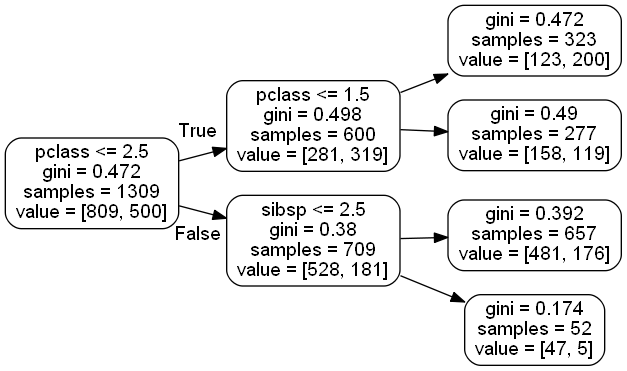

In [74]:
dot_data = StringIO()  
tree.export_graphviz(db_tree, out_file=dot_data,  
        feature_names=x.columns, rounded=True, rotate=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png()) 

In [75]:
accuracy = db_tree.score(x,y) 
print("Your decision tree is {:.2f}% accurate.".format(accuracy*100))

Your decision tree is 67.69% accurate.


Since this is my least accurate model so far, i will no do predictions. Instead, i will move on to the next model and try to improve the accuracy.

## Model No.4

In [76]:
y = df4['survived']
x = df4[['gender', 'parch']]

In [77]:
db_tree = tree.DecisionTreeClassifier(max_depth = 2, random_state = 0)
dp_tree = db_tree.fit(x,y)

### <center> Figure No.8 </center>

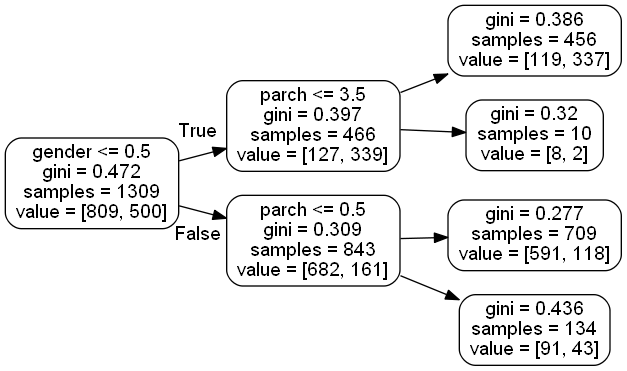

In [78]:
dot_data = StringIO()  
tree.export_graphviz(db_tree, out_file=dot_data,  
        feature_names=x.columns, rounded=True, rotate=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png()) 

In [79]:
accuracy = db_tree.score(x,y) 
print("Your decision tree is {:.2f}% accurate.".format(accuracy*100))

Your decision tree is 78.46% accurate.


#### Predictions

In [80]:
print(db_tree.predict([[0, 3]])) 

[1]


In [81]:
print(db_tree.predict([[1, 3]])) 

[0]


In [82]:
print(db_tree.predict([[0, 0]])) 

[1]


## Model No. 5

In [83]:
df4.columns

Index(['pclass', 'survived', 'sex', 'parch', 'sibsp', 'gender'], dtype='object')

In [84]:
y = df4['survived']
x = df4[['sibsp', 'gender']]

In [85]:
db_tree = tree.DecisionTreeClassifier(max_depth = 2, random_state = 0)
dp_tree = db_tree.fit(x,y)

### <center> Figure No.9 </center>

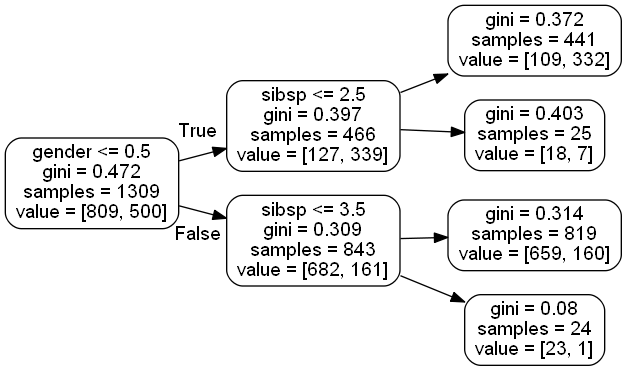

In [86]:
dot_data = StringIO()  
tree.export_graphviz(db_tree, out_file=dot_data,  
        feature_names=x.columns, rounded=True, rotate=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png()) 

In [87]:
accuracy = db_tree.score(x,y) 
print("Your decision tree is {:.2f}% accurate.".format(accuracy*100))

Your decision tree is 78.84% accurate.


#### Predictions

In [88]:
print(db_tree.predict([[0, 0]]))

[1]


In [89]:
print(db_tree.predict([[0, 1]]))

[0]


In [90]:
print(db_tree.predict([[3, 1]]))

[0]


# Memo

Before running any analysis on the data from the Titanic.csv file, I swam through the data to understand the story better. I began by looking at the size of the data and checking if there is any missing data. There was actually quite a lot of data missing, 1309 columns and 15 rows, so before dropping any data I had to dig into this more. I noticed age, cabin and destination have the most amount of missing values. I considered which columns are important to keep and made a subsetted dataframe called df3 with columns of interest. After doing so, i then dropped the missing values and checked the shape again to see how much data has been dropped. After creating this dataframe, i created three visualizations to get a better understanding of the data and columns that could be of interest for my models later on. In Figure No.1 I learned the majority class on the titanic was class 3, then class 1 and lastly class 2. This could be interesting to investigate if their ticket class allowed them to have a better chance of surving. 

Before I am able to create a number of decision trees, I had to change columns of interest into binary columns. For example, the 'gender' column became a column named 'sex' where 0 = female and 1 = male. Once this was completed i was ready to create my decision trees. 

I ran through a few different decision tree models to find the most accurate model that could predict if a person would survive or not. This turned out to be Figure No. 9 with an accuracy of 78.84%. This model took their gender and their number of siblings/spouses to predict their survival. In the begining of the tree, it starts with a high gini score of 0.472 and gets as low as 0.08 the further you are down the tree. Going through the tree, if your gender is less than 0.5, meaning your gender code is a 0 so you are a female, and you coninute with the "True" arrow. It next looks at how many siblings/spouses you have and if you have less than 2.5, you end up with a gini score of 0.372. The route that gives you the best gini score is to be a male and have less than 3.5 siblings/spouses, to end with a gini code of 0.08. 

To further explain, I will give three different examples of people who could have been on the Titanic. According to the model, if there was a women who had 1 spouse and no siblings on the ship with her, she would have a 24.74% chance of dying. A man with 1 spouse on the boat, with no other siblings, would have an 80.4% chance of dying. A woman who had 1 spouse and 3 siblings on the ship would have a 72% chance of dying. To find these numbers, I found the probability for each option on the tree. To start, the overall probability of dying was 62%. Where men had an 81% chance of dying and women only had a 27% chance of dying but if they have more than 2.5 siblings/spouses they have a 72% chance of dying.

From these examples, I takeaway that it is best to be female with less than 2.5 siblings/spouses on the Titanic will have the best chance of survival. This is probably related to women and children having priority of the lifeboats, while men had the responsibility to help them onto the lifeboats before they were allowed on themselves. 